# A Deep Learning Method for Fraud Detection in Online Banking Transactions By Saikumar Konda 

# Supervisor: Dr. Sandra Smart-Akande

# DATASET UPLOADING AND PREPROCESSING

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset
file_path = 'data/creditcard.csv'
df = pd.read_csv(file_path)

# Checking for any missing values
print(df.isnull().sum())

# Standardize the 'Time' and 'Amount' features
scaler = StandardScaler()
df['Time'] = scaler.fit_transform(df[['Time']])
df['Amount'] = scaler.fit_transform(df[['Amount']])



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Displaying the first few rows of the processed dataset 
print(df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [4]:
# Splitting the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Displaying the sizes of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 227845 samples
Testing set size: 56962 samples


# EDA - Exploratory Data Analysis

In [6]:
import pandas as pd

#'df' is our DataFrame
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
               Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -3.065637e-16  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std    1.000002e+00  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min   -1.996583e+00 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%   -8.552120e-01 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%   -2.131453e-01  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    9.372174e-01  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    1.642058e+00  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+

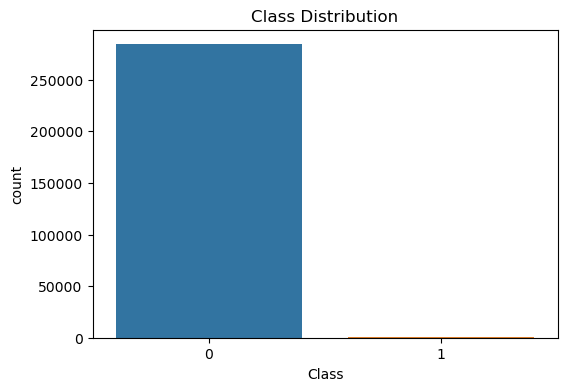

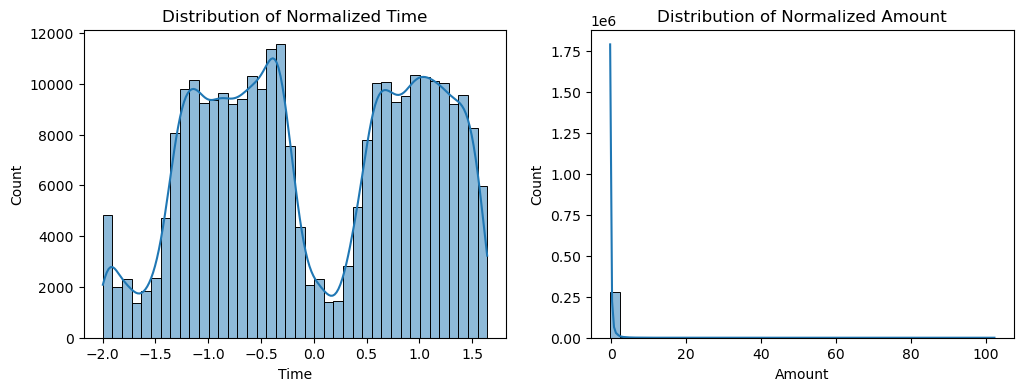

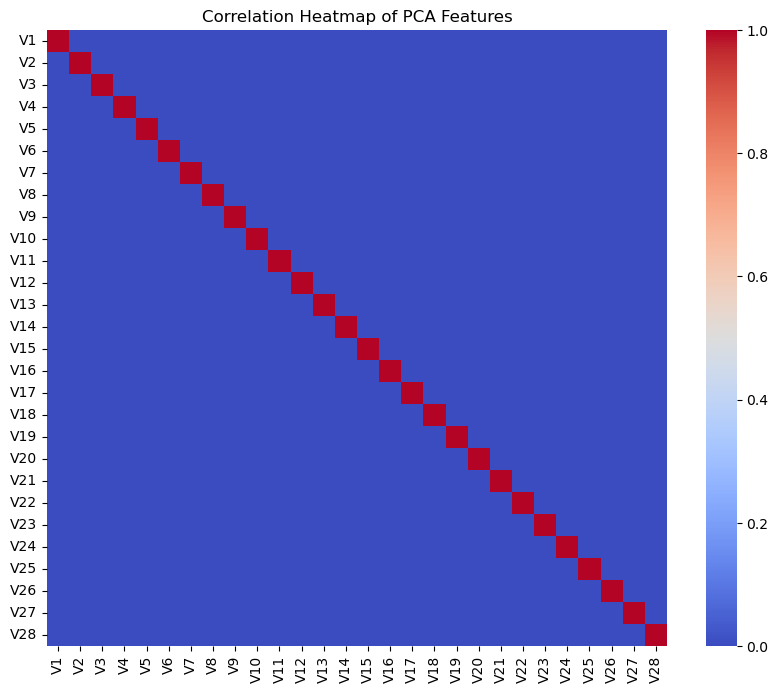

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizing the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Histograms for 'Time' and 'Amount'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Time'], bins=40, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Normalized Time')
sns.histplot(df['Amount'], bins=40, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Normalized Amount')

# Correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 1:29].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of PCA Features')
plt.show()


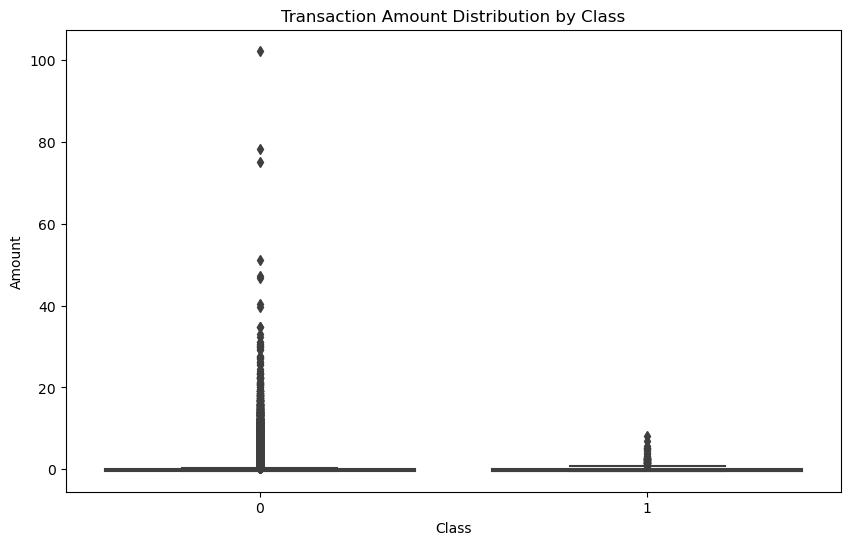

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Class')
plt.show()


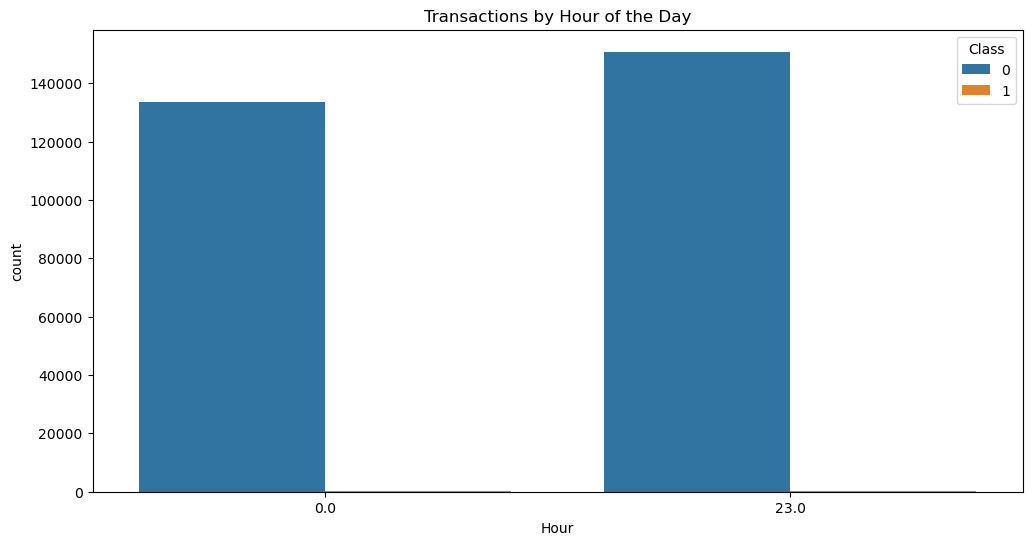

In [27]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Class', data=df)
plt.title('Transactions by Hour of the Day')
plt.show()


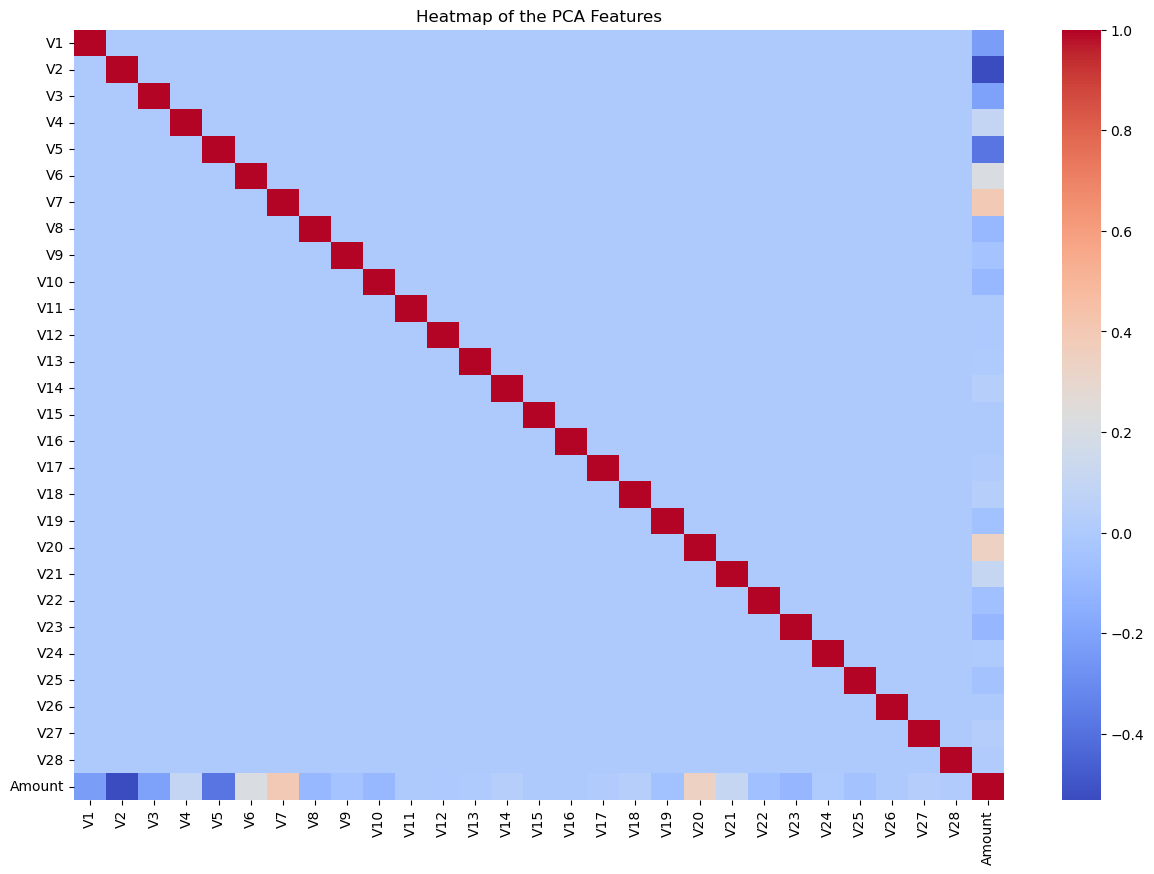

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, 1:-2].corr(), cmap='coolwarm', annot=False)
plt.title('Heatmap of the PCA Features')
plt.show()


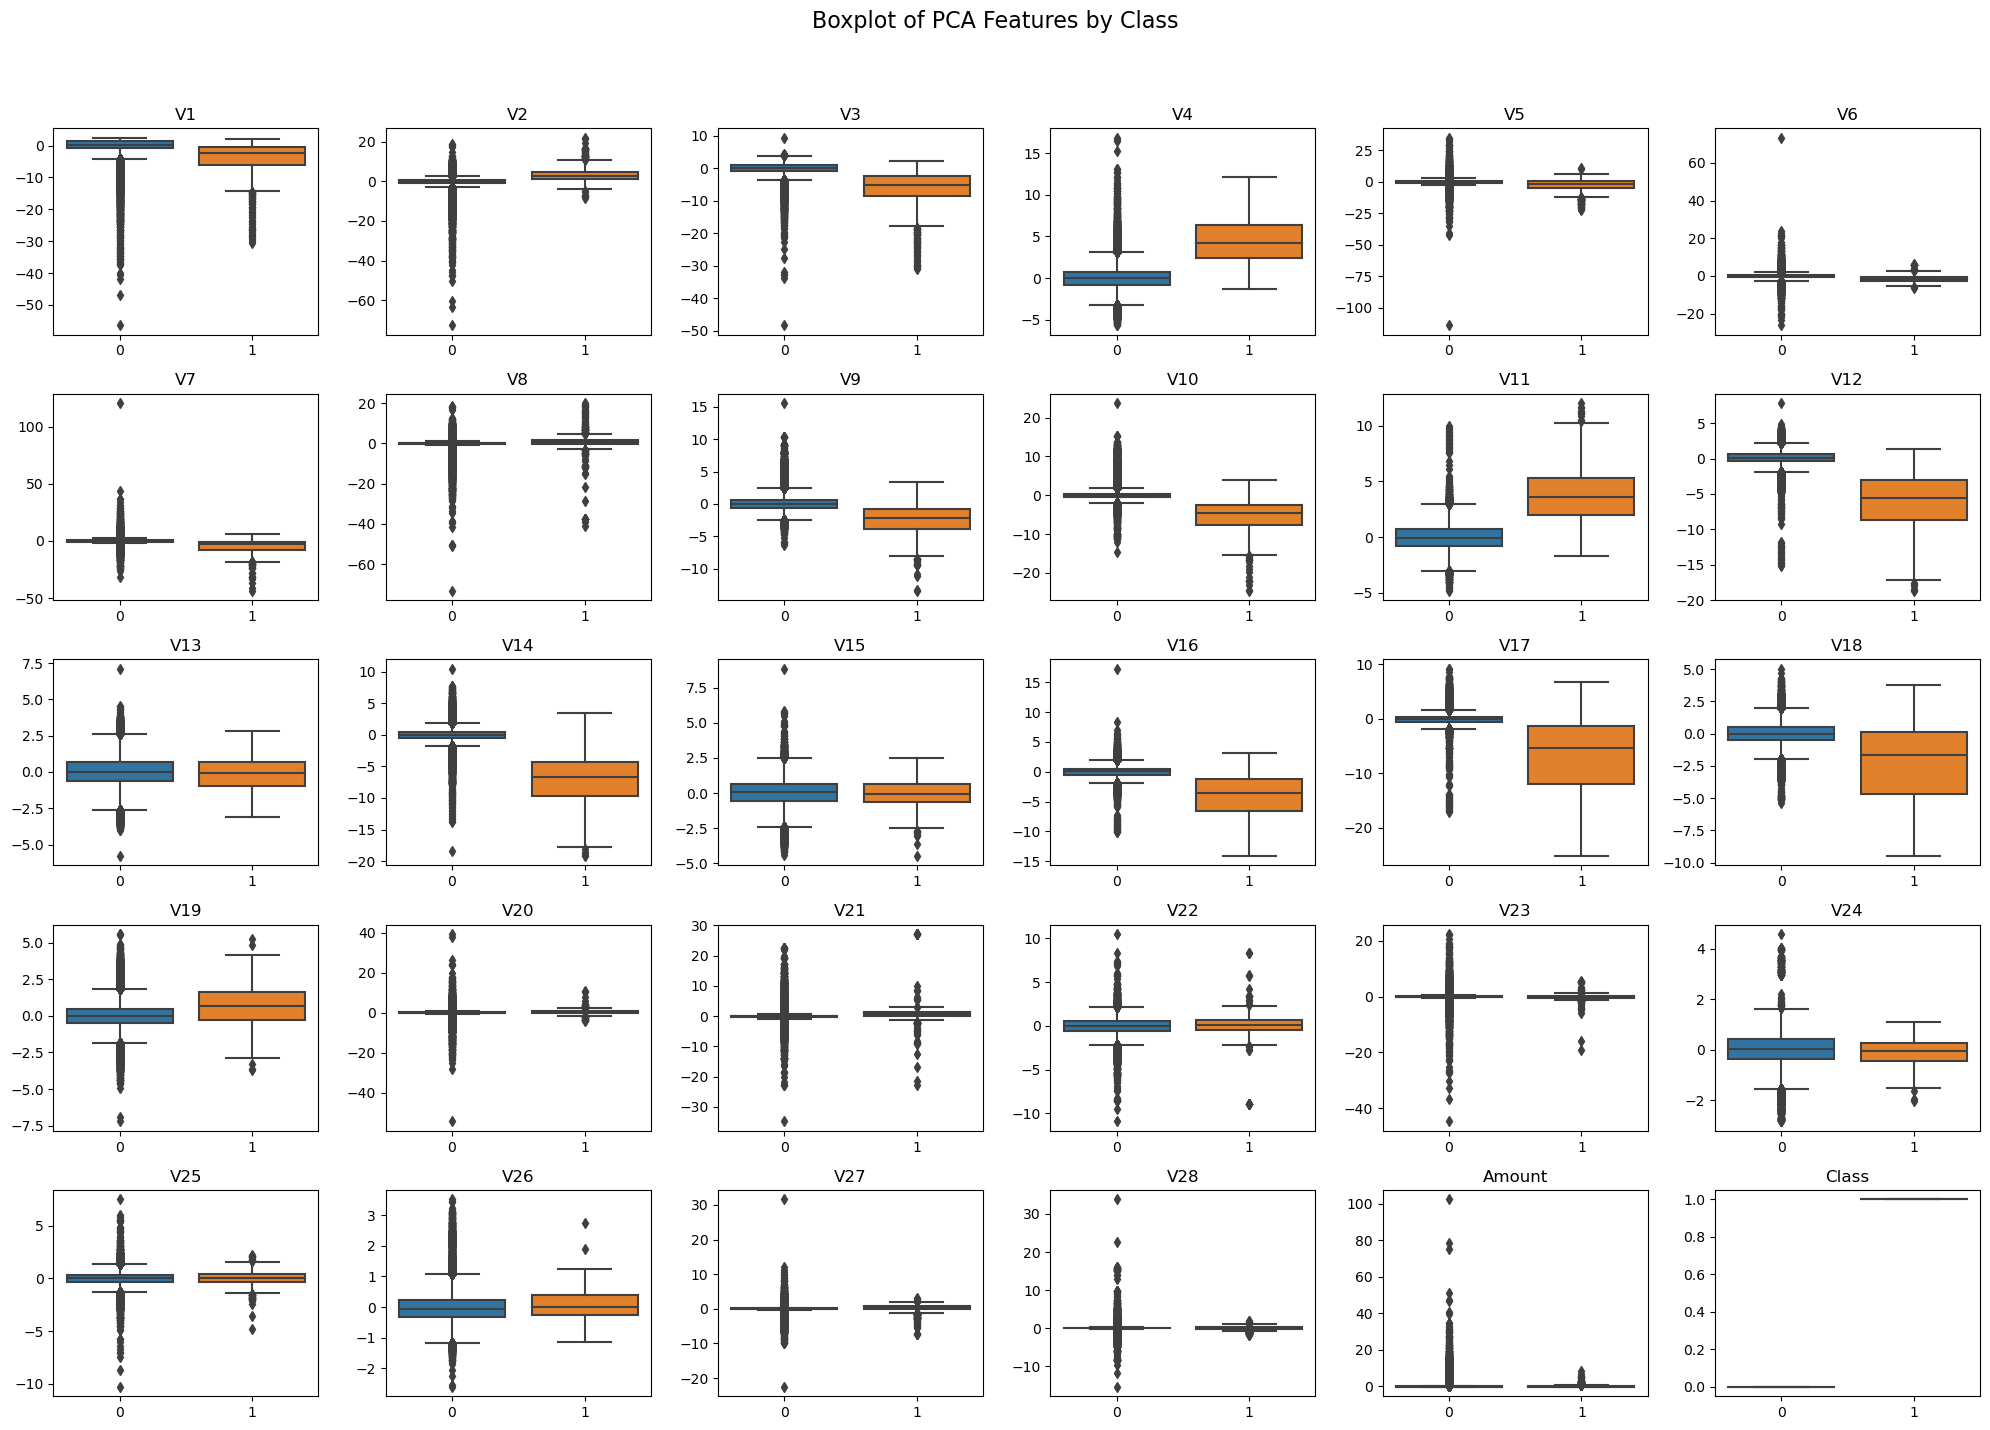

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
fig.suptitle('Boxplot of PCA Features by Class', fontsize=16)
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='Class', y=df.columns[i+1], data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(df.columns[i+1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


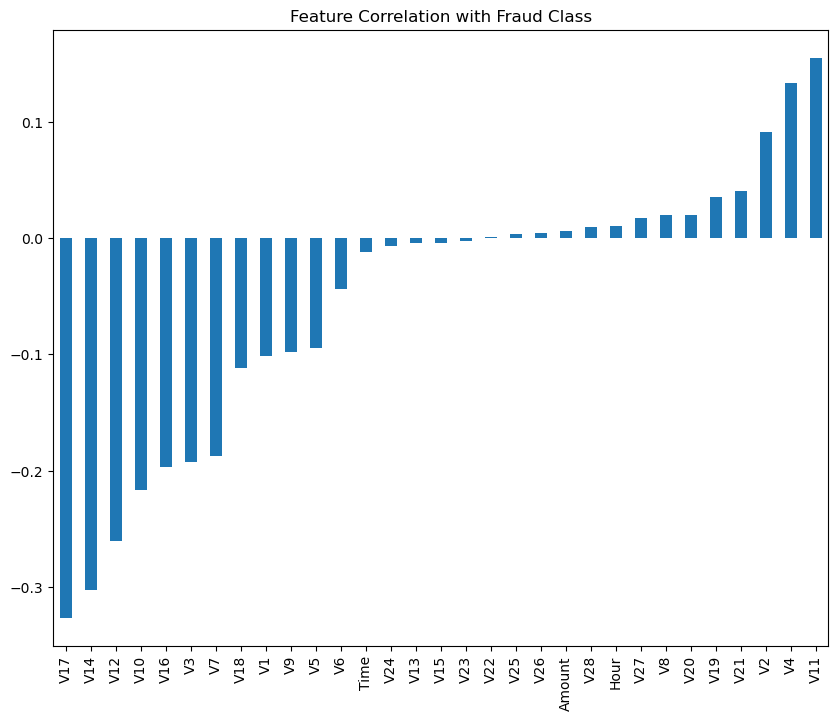

Statistical Summary by Class:
            Time                  V1                  V2                  V3  \
           mean       std      mean       std      mean       std      mean   
Class                                                                         
0      0.000513  0.999915  0.008258  1.929814 -0.006271  1.636146  0.012171   
1     -0.296223  1.007313 -4.771948  6.783687  3.623778  4.291216 -7.033281   

                       V4            ...       V26                 V27  \
            std      mean       std  ...      mean       std      mean   
Class                                ...                                 
0      1.459429 -0.007860  1.399333  ... -0.000089  0.482241 -0.000295   
1      7.110937  4.542029  2.873318  ...  0.051648  0.471679  0.170575   

                      V28              Amount                 Hour             
            std      mean       std      mean       std       mean        std  
Class                                     

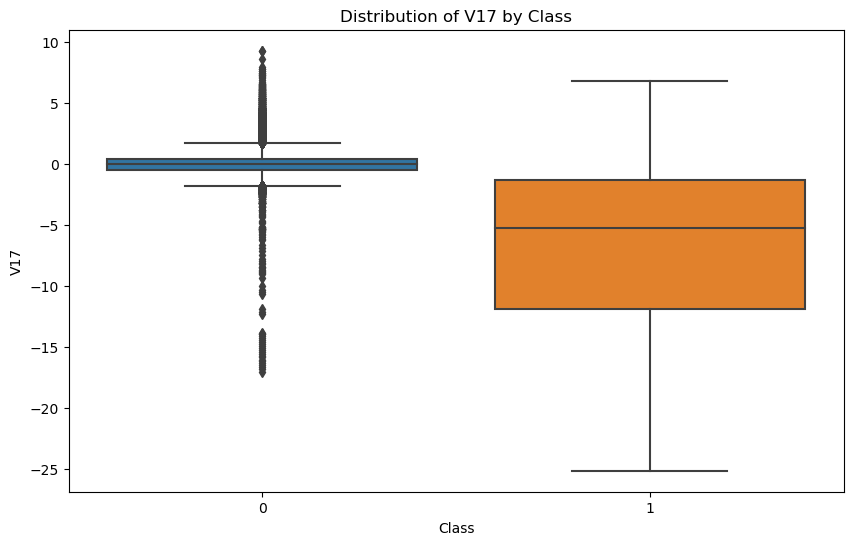

Results of t-test on V17:
T-statistic = 184.33439340877757, P-value = 0.0



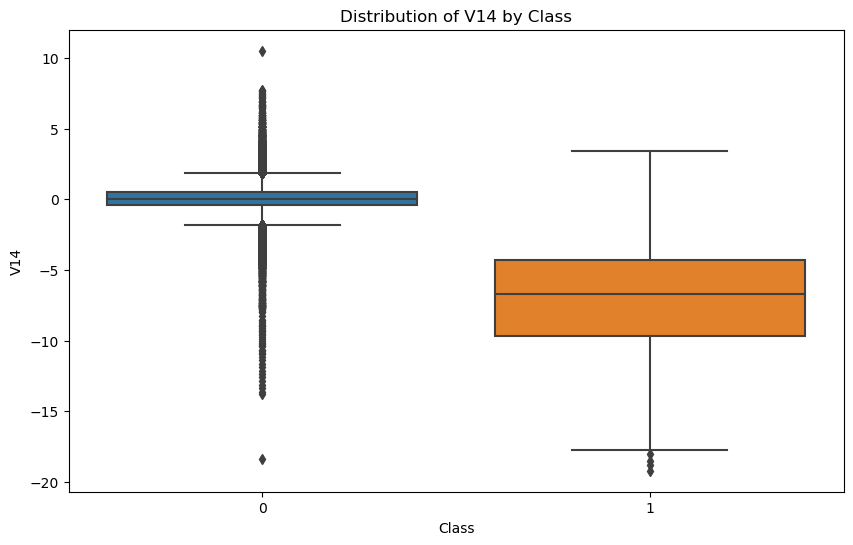

Results of t-test on V14:
T-statistic = 169.39760266328938, P-value = 0.0



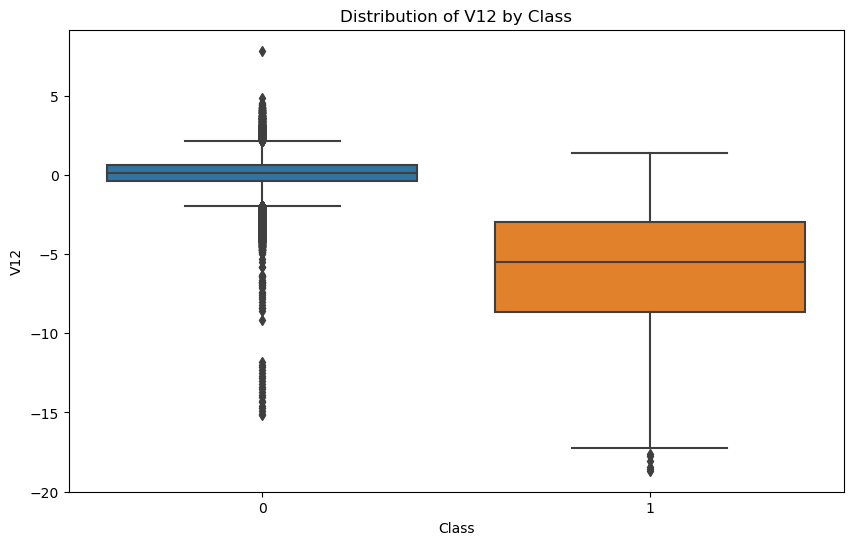

Results of t-test on V12:
T-statistic = 144.04798631472968, P-value = 0.0



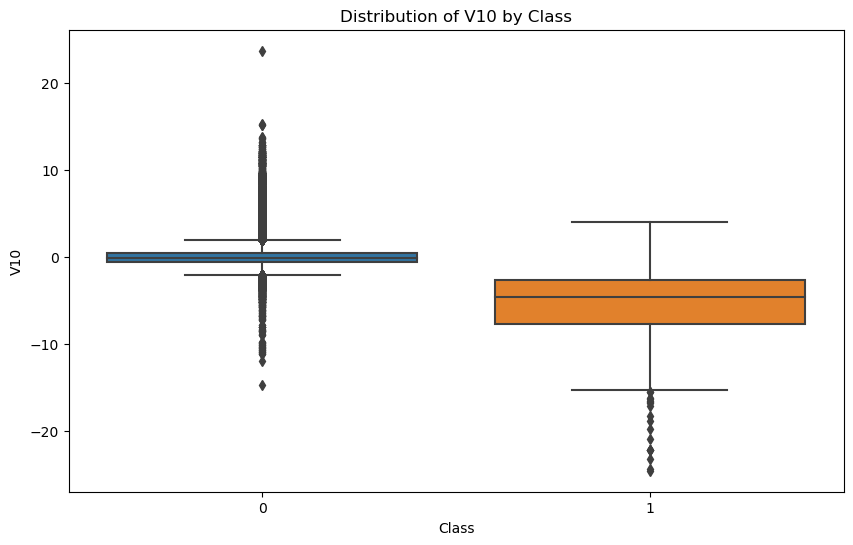

Results of t-test on V10:
T-statistic = 118.56635266832792, P-value = 0.0



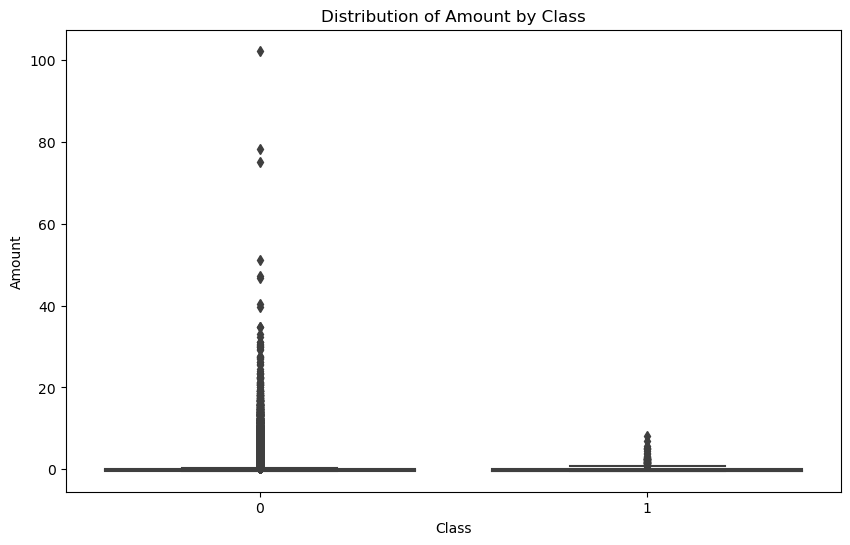

Results of t-test on Amount:
T-statistic = -3.005552313971408, P-value = 0.002651220649191699



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



# Calculating the correlations with the target variable 'Class'
correlations = df.corr()['Class'].sort_values()

# Plot correlations with the class
plt.figure(figsize=(10, 8))
correlations.drop('Class').plot(kind='bar')
plt.title('Feature Correlation with Fraud Class')
plt.show()

# Statistical summary by class
feature_stats = df.groupby('Class').agg(['mean', 'std'])

# Displaying the statistical summary
print("Statistical Summary by Class:\n", feature_stats)

# Selecting a few features based on their correlation and importance
important_features = ['V17', 'V14', 'V12', 'V10', 'Amount']

for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

    # Perform t-test between the distributions in different classes
    t_stat, p_val = ttest_ind(df[df['Class'] == 0][feature], df[df['Class'] == 1][feature])
    print(f"Results of t-test on {feature}:")
    print(f"T-statistic = {t_stat}, P-value = {p_val}\n")


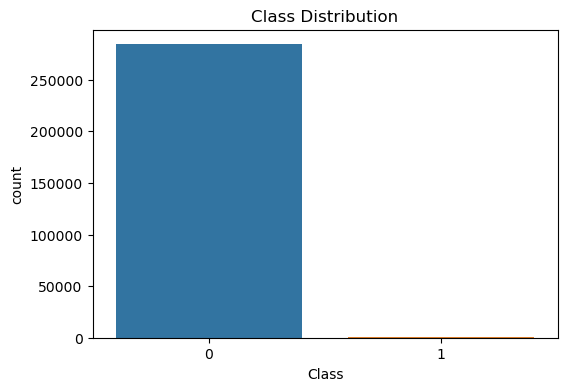

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


# MODEL EVALUATION 

# 5 Fold Evaluation

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Defining the model
def create_dense_model():
    model = Sequential([
        Dense(256, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Evaluating the model using 5-fold cross-validation
skf = StratifiedKFold(n_splits=5)
fold_no = 1
for train_index, val_index in skf.split(X_train, y_train):
    print(f'Training on fold {fold_no}...')
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model = create_dense_model()
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=1)
    predictions = (model.predict(X_val_fold) > 0.5).astype(int)
    
    print(f'Scores for fold {fold_no}:')
    print(f'Accuracy: {accuracy_score(y_val_fold, predictions)}')
    print(f'Precision: {precision_score(y_val_fold, predictions)}')
    print(f'Recall: {recall_score(y_val_fold, predictions)}')
    print(f'F1-Score: {f1_score(y_val_fold, predictions)}')
    
    fold_no += 1


Training on fold 1...


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9972 - loss: 0.0217
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9992 - loss: 0.0051
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9993 - loss: 0.0051
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9993 - loss: 0.0045
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9993 - loss: 0.0043
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9991 - loss: 0.0038
Epoch 9/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9993 - loss: 0.0047
Epoch 10/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9994 - loss: 0.0037
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Scores for fold 1:
Accuracy: 0.9995172156509908
Precision: 0.87837

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9957 - loss: 0.0251
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9993 - loss: 0.0051
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9993 - loss: 0.0045
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9995 - loss: 0.0034
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 9/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9994 - loss: 0.0041
Epoch 10/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9992 - loss: 0.0031
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Scores for fold 2:
Accuracy: 0.9993197129627598
Precision: 0.91379

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9960 - loss: 0.0264
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9993 - loss: 0.0043
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9994 - loss: 0.0043
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 9/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9992 - loss: 0.0035
Epoch 10/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9994 - loss: 0.0031
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Scores for fold 3:
Accuracy: 0.9992319339902126
Precision: 0.92307

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9943 - loss: 0.0310
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9992 - loss: 0.0056
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9992 - loss: 0.0049
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9993 - loss: 0.0049
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 168s 59ms/step - accuracy: 0.9994 - loss: 0.0043
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9994 - loss: 0.0026
Epoch 9/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9992 - loss: 0.0042
Epoch 10/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9993 - loss: 0.0031
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Scores for fold 4:
Accuracy: 0.9994513814215804
Precision: 0.864

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2849/2849 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9974 - loss: 0.0219
Epoch 2/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9992 - loss: 0.0045
Epoch 3/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 4/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 5/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9994 - loss: 0.0037
Epoch 6/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9994 - loss: 0.0041
Epoch 7/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 8/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 9/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 10/10
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9993 - loss: 0.0034
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Scores for fold 5:
Accuracy: 0.9994074919353069
Precision: 0.8513513513513513

# LSTM MODEL

In [4]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
def create_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape features for LSTM Layer
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Training the LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluating the model
predictions = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)
print('LSTM Model Performance:')
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'F1-Score: {f1_score(y_test, predictions)}')


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 240s 65ms/step - accuracy: 0.9971 - loss: 0.0244
Epoch 2/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 228s 64ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 3/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 216s 61ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 4/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 237s 67ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 5/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 472s 133ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 6/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 238s 67ms/step - accuracy: 0.9992 - loss: 0.0045
Epoch 7/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 248s 70ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 8/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 228s 64ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 9/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 215s 60ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 10/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 219s 61ms/step - accuracy: 0.9993 - loss: 0.0041
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step
LSTM Model Performance:
Accuracy: 0.9994031

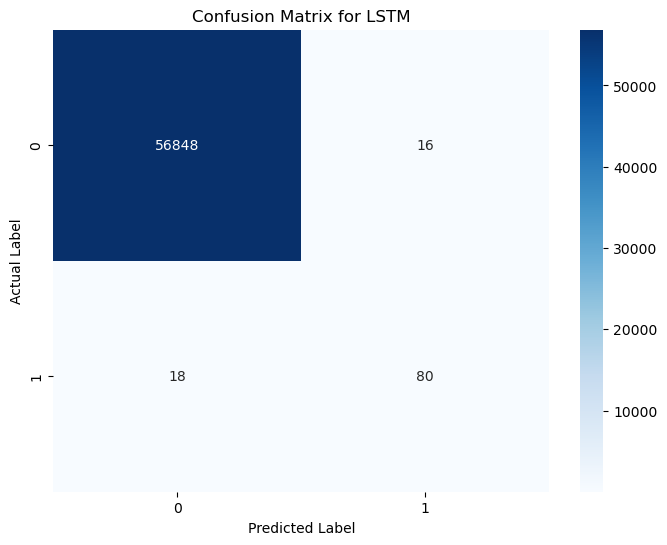

In [22]:
#  'predictions' and 'y_test' are our predicted and actual labels from the test set for LSTM
lstm_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# LogisticRegression Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initializing the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Fitting the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluation using classification report
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

# Additional evaluation metrics
accuracy = accuracy_score(y_test, lr_predictions)
roc_auc = roc_auc_score(y_test, lr_probabilities)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Cross-Validation to evaluate model stability
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validated ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC Score: {cv_scores.mean():.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 1.00
ROC AUC Score: 0.97
Cross-Validated ROC AUC Scores: [0.95948813 0.97238605 0.96016652 0.95529893 0.97164201]
Mean CV ROC AUC Score: 0.96


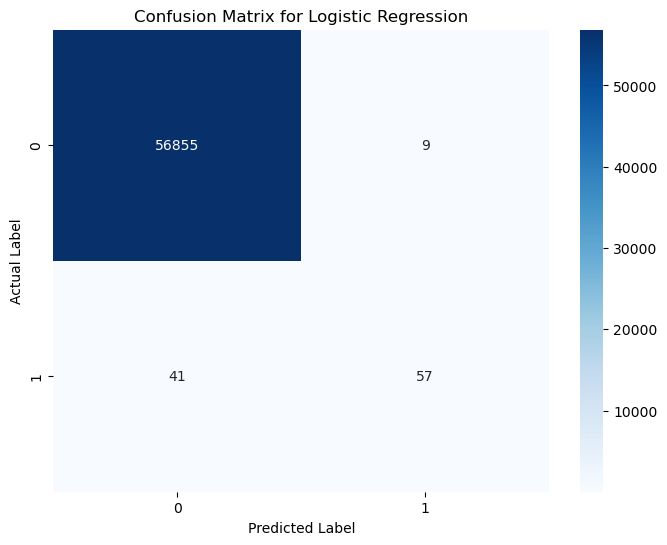

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  'lr_predictions' and 'y_test' are our predicted and actual labels from the test set
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# XGBClassifier

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initializing the XGBoost Classifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predicting on the test data
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Basic evaluation with classification report and accuracy
print("XGBoost Model Performance:")
print(classification_report(y_test, xgb_predictions))
print(f'Accuracy: {accuracy_score(y_test, xgb_predictions):.2f}')

# Advanced evaluation with ROC AUC score
roc_auc = roc_auc_score(y_test, xgb_probabilities)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Cross-Validation to evaluate model stability
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validated ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC Score: {cv_scores.mean():.2f}")


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 1.00
ROC AUC Score: 0.98
Cross-Validated ROC AUC Scores: [0.98924511 0.97229368 0.94731752 0.98974154 0.97895174]
Mean CV ROC AUC Score: 0.98


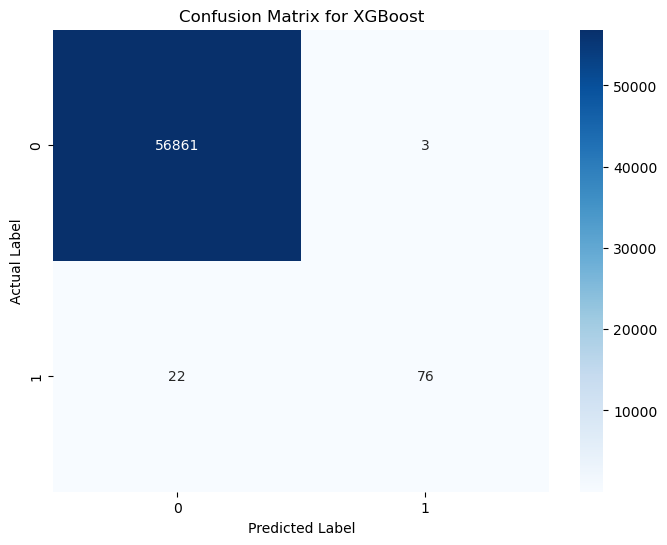

In [23]:
#  'xgb_predictions' and 'y_test' are our predicted and actual labels from the test set
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# CNN model

In [37]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

# Defining the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preparing the data
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize and train the CNN model
cnn_model = create_cnn_model((X_train.shape[1], 1))
history = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on test set
predictions = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
# Print evaluation metrics
print(f'CNN Model Accuracy: {accuracy:.2f}')
print(f'CNN Model Precision: {precision:.2f}')
print(f'CNN Model Recall: {recall:.2f}')
print(f'CNN Model F1-Score: {f1:.2f}')
# Evaluate the model on test set
predictions = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)

# Print evaluation metrics


print('CNN Model Performance:')
print(classification_report(y_test, predictions, target_names=['Non-Fraud', 'Fraud']))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9962 - loss: 0.0202 - val_accuracy: 0.9994 - val_loss: 0.0046
Epoch 2/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 3/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 4/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 5/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 6/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 7/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 8/10
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.9993 -

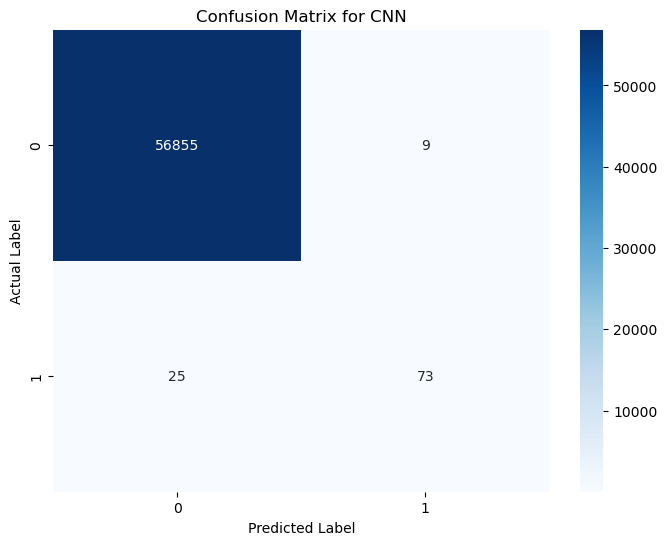

In [39]:
#  'predictions' and 'y_test' are our predicted and actual labels from the test set for CNN
cnn_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Model Results Visualization

                  Model  Accuracy  Precision  Recall  F1-Score ROC AUC Score
0   Logistic Regression    1.0000       0.86    0.58      0.70          0.97
1               XGBoost    1.0000       0.96    0.78      0.86          0.98
2  Dense Neural Network    0.9993       0.85    0.77      0.81           N/A
3                  LSTM    0.9994       0.83    0.78      0.80           N/A
4                   CNN    0.9994       0.88    0.76      0.81           N/A


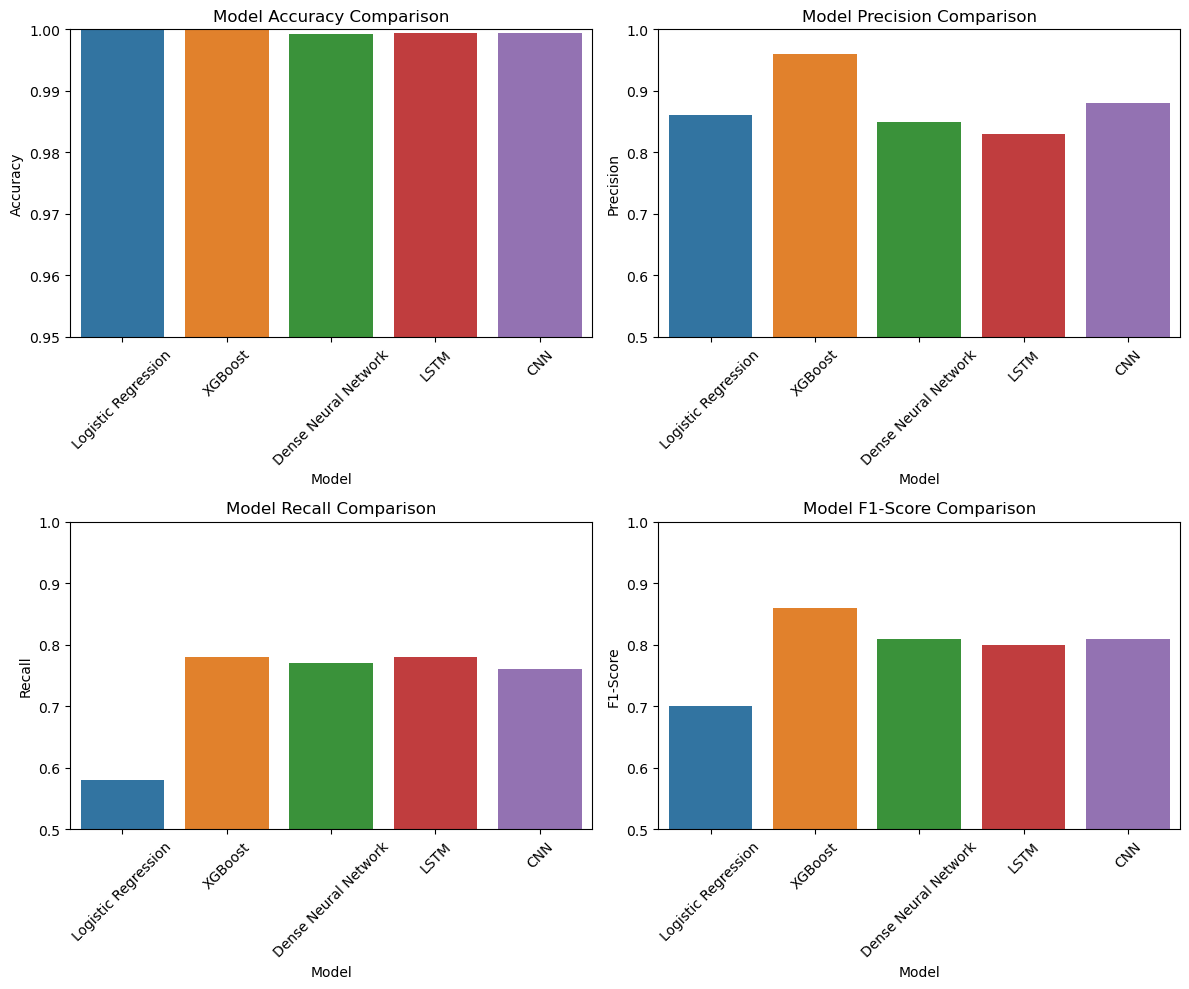

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for creating a comparative table
data = {
    "Model": ["Logistic Regression", "XGBoost", "Dense Neural Network", "LSTM", "CNN"],
    "Accuracy": [1.00, 1.00, 0.9993, 0.9994, 0.9994],
    "Precision": [0.86, 0.96, 0.85, 0.83, 0.88],
    "Recall": [0.58, 0.78, 0.77, 0.78, 0.76],
    "F1-Score": [0.70, 0.86, 0.81, 0.80, 0.81],
    "ROC AUC Score": [0.97, 0.98, "N/A", "N/A", "N/A"]
}

# Creating DataFrame
df_models = pd.DataFrame(data)

# Displaying the DataFrame
print(df_models)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()

# Accuracy Plot
sns.barplot(data=df_models, x='Model', y='Accuracy', ax=ax[0])
ax[0].set_title("Model Accuracy Comparison")
ax[0].set_ylim(0.95, 1.00)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# Precision Plot
sns.barplot(data=df_models, x='Model', y='Precision', ax=ax[1])
ax[1].set_title("Model Precision Comparison")
ax[1].set_ylim(0.5, 1.00)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

# Recall Plot
sns.barplot(data=df_models, x='Model', y='Recall', ax=ax[2])
ax[2].set_title("Model Recall Comparison")
ax[2].set_ylim(0.5, 1.00)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

# F1-Score Plot
sns.barplot(data=df_models, x='Model', y='F1-Score', ax=ax[3])
ax[3].set_title("Model F1-Score Comparison")
ax[3].set_ylim(0.5, 1.00)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


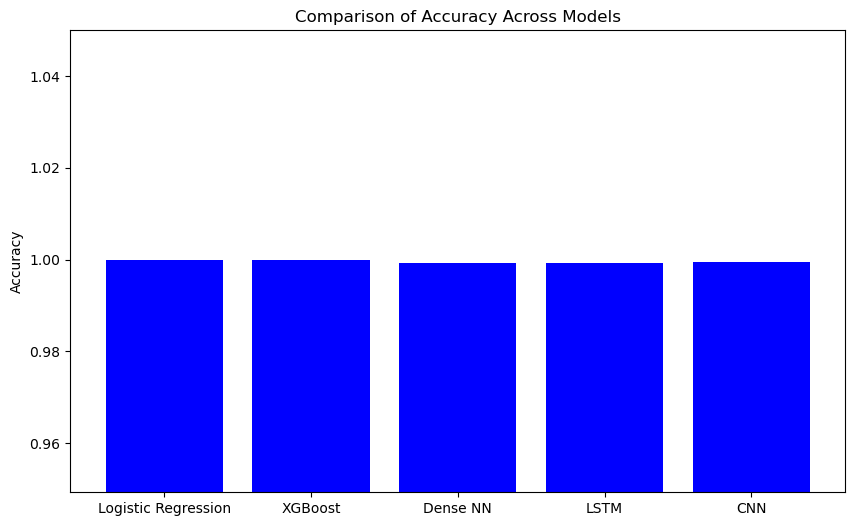

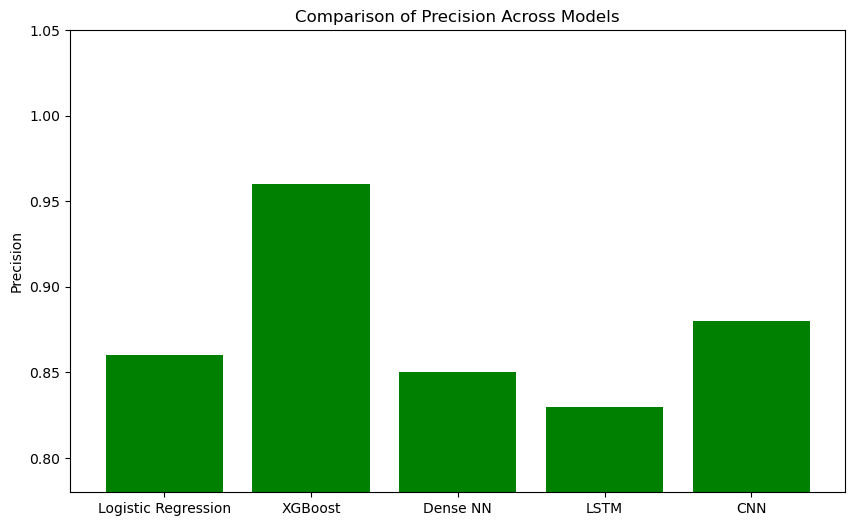

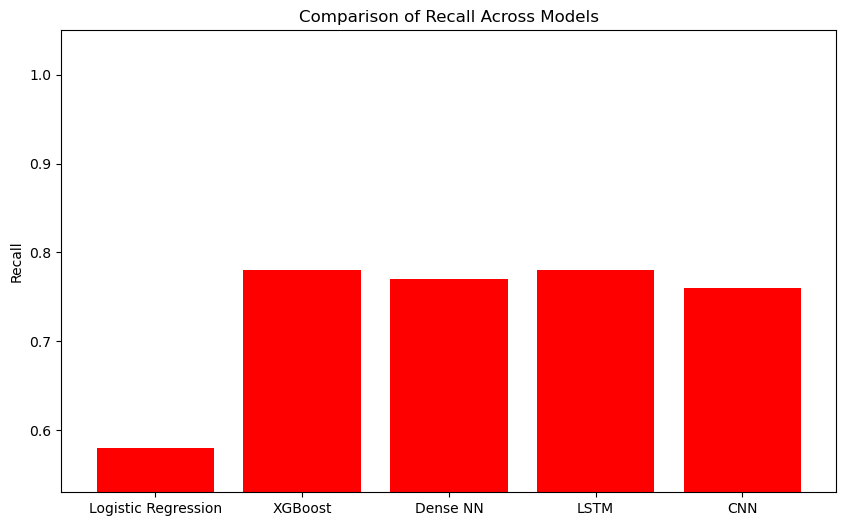

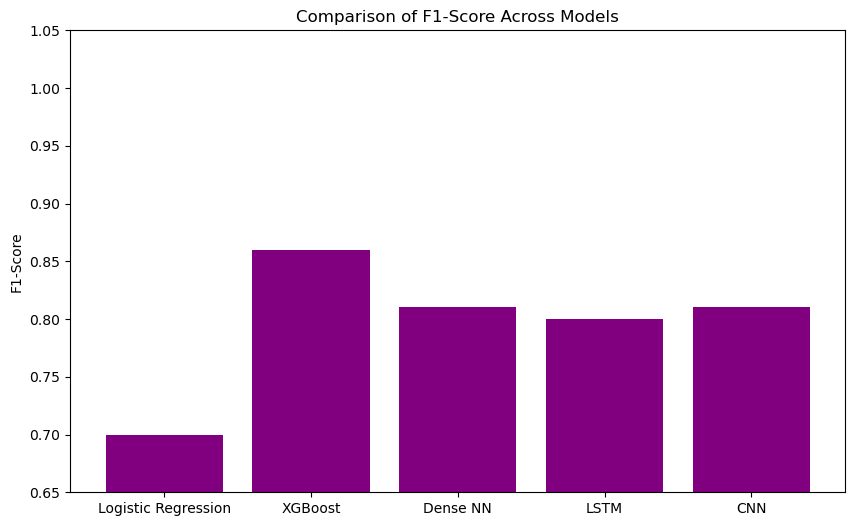

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'XGBoost', 'Dense NN', 'LSTM', 'CNN']

# Performance metrics
accuracies = [1.00, 1.00, 0.9993, 0.9993, 0.9994]
precisions = [0.86, 0.96, 0.85, 0.83, 0.88]
recalls = [0.58, 0.78, 0.77, 0.78, 0.76]
f1_scores = [0.70, 0.86, 0.81, 0.80, 0.81]

# Function to plot metrics
def plot_metrics(metric_values, metric_name, color):
    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(models))
    plt.bar(y_pos, metric_values, color=color)
    plt.xticks(y_pos, models)
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} Across Models')
    plt.ylim(min(metric_values)-0.05, 1.05)
    plt.show()

# Plotting each metric
plot_metrics(accuracies, 'Accuracy', 'blue')
plot_metrics(precisions, 'Precision', 'green')
plot_metrics(recalls, 'Recall', 'red')
plot_metrics(f1_scores, 'F1-Score', 'purple')


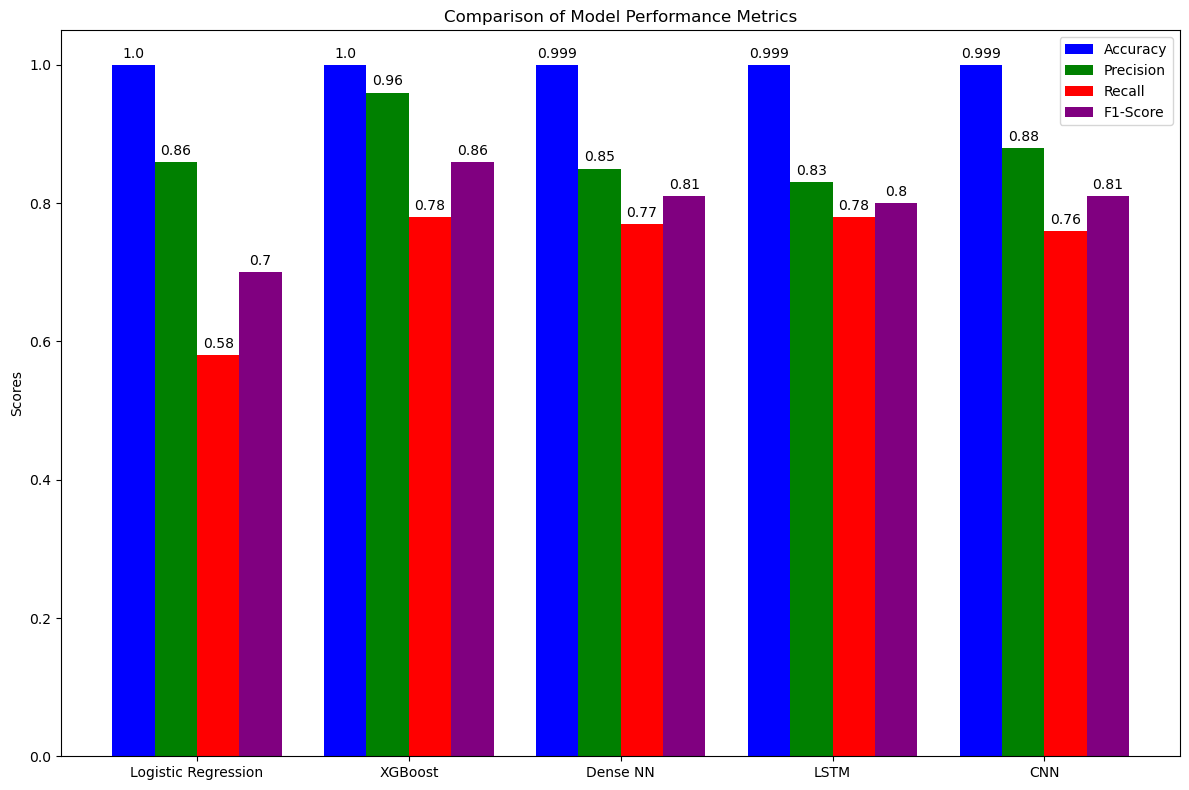

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['Logistic Regression', 'XGBoost', 'Dense NN', 'LSTM', 'CNN']
accuracies = [1.00, 1.00, 0.9993, 0.9993, 0.9994]
precisions = [0.86, 0.96, 0.85, 0.83, 0.88]
recalls = [0.58, 0.78, 0.77, 0.78, 0.76]
f1_scores = [0.70, 0.86, 0.81, 0.80, 0.81]

x = np.arange(len(models))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width*1.5, accuracies, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - width/2, precisions, width, label='Precision', color='green')
rects3 = ax.bar(x + width/2, recalls, width, label='Recall', color='red')
rects4 = ax.bar(x + width*1.5, f1_scores, width, label='F1-Score', color='purple')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


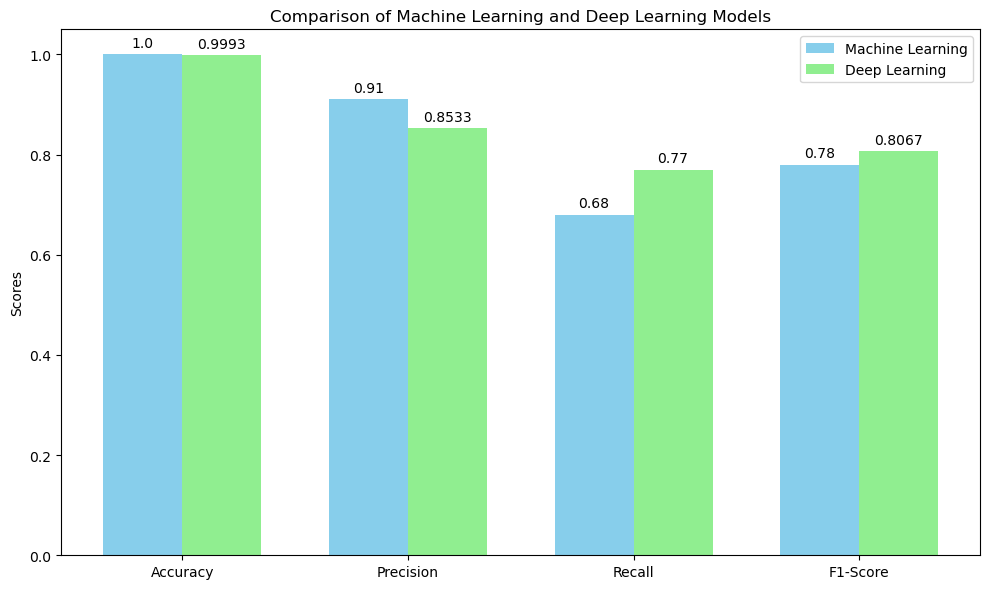

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
# Average metrics for traditional ML models (Logistic Regression, XGBoost)
ml_accuracy = np.mean([1.00, 1.00])
ml_precision = np.mean([0.86, 0.96])
ml_recall = np.mean([0.58, 0.78])
ml_f1 = np.mean([0.70, 0.86])

# Average metrics for deep learning models (Dense NN, LSTM, CNN)
dl_accuracy = np.mean([0.9993, 0.9993, 0.9994])
dl_precision = np.mean([0.85, 0.83, 0.88])
dl_recall = np.mean([0.77, 0.78, 0.76])
dl_f1 = np.mean([0.81, 0.80, 0.81])

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
ml_scores = [ml_accuracy, ml_precision, ml_recall, ml_f1]
dl_scores = [dl_accuracy, dl_precision, dl_recall, dl_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ml_scores, width, label='Machine Learning', color='skyblue')
rects2 = ax.bar(x + width/2, dl_scores, width, label='Deep Learning', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Machine Learning and Deep Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
